# 🖥️ Desarrollo del Análisis de Rotación de Empleados

Se refiere a la cantidad de empleados que dejan una empresa y son reemplazados en un período de tiempo determinado.
Objetivo: Análisis descriptivo de la rotación voluntaria de empleados pueden estar influenciados por múltiples factores.

Pero... ¿qué es exactamente la rotación? Se refiere a la cantidad de empleados que dejan una empresa generando su próximo reemplazo.
Las causas principales pueden ser : Renuncias voluntarias (empleados que consiguen otro trabajo o renuncian por motivos personales); Despidos (por bajo rendimiento o reestructuración); Jubilaciones (en algunos casos).

Objetivo metodológico:

1.- Análisis Descriptivo: Nos enfocamos en resumir y describir los datos sin sacar conclusiones profundas.
Técnicas usadas: tablas, gráficos de barras, histogramas, medidas de tendencia central (media, mediana, moda).

2.- Análisis Diagnóstico: Quisimos encontrar las relaciones y causas de los datos descritos.
Técnicas usadas: correlaciones, segmentaciones y análisis de tendencias fundamental (gráficos de líneas).

Dentro de cada análisis podríamos encontrar:

1. Variables Numéricas

    1.1.- Análisis Descriptivo

    1.2.- Análisis Diagnóstico

        A. Análisis Bivariado (relacionar variables y encontrar patrones).

        B. Visualización del Análisis (gráficos y tablas clave para entender el problema)

2. Variables Categóricas

    2.1.- Análisis Descriptivo

    2.2.- Análisis Diagnóstico

        A. Análisis Bivariado

        B. Visualización del Análisis

3. Análisis de Contingencias

# 1. Variables Numéricas

## 1.1.- 🔍 Análisis Descriptivo

In [5]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Para este análisis general, en primer lugar, creamos un DataFrame tras la lectura del archivo .csv, el cual contiene los datos de los empleados que nos ha entregado la empresa.

In [140]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [141]:
df_analisis.sample(20)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
1411,no,travel_rarely,3.0,3,1.0,female,3,1,4,unknown,1,none,21,part_time,0,5,1,0,1997,yes,1.0,28111.13,3.0
440,no,unknown,10.0,5,2.0,male,3,2,1,unknown,2,none,13,none,3,3,7,7,1984,no,10.0,53914.11,3.0
597,no,unknown,13.0,1,2.0,male,3,1,3,unknown,1,none,11,none,0,1,7,6,1998,yes,7.0,28111.13,3.0
431,yes,unknown,1.0,4,1.0,male,2,1,1,single,6,no,13,part_time,0,2,9,7,1994,yes,10.0,23620.00,1.0
1315,no,unknown,7.0,2,2.0,female,3,2,3,unknown,1,no,14,part_time,1,5,6,2,1994,no,10.0,53914.11,2.0
756,no,travel_frequently,10.0,4,3.0,male,3,2,3,unknown,3,no,11,part_time,0,2,6,2,1985,yes,10.0,53914.11,3.0
610,no,unknown,2.0,4,3.0,female,2,3,3,married,6,no,11,part_time,1,4,9,0,1969,yes,13.0,100071.84,3.0
975,yes,unknown,9.0,2,3.0,male,2,1,1,single,0,yes,22,part_time,0,0,3,2,1992,no,4.0,28111.13,3.0
715,no,unknown,1.0,2,4.0,female,2,2,4,married,9,none,13,full_time,1,4,4,2,1981,no,8.0,60620.00,3.0
672,no,non_travel,26.0,3,4.0,female,4,4,4,single,2,none,12,full_time,0,3,5,4,1969,yes,10.0,153407.07,3.0


In [142]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


## 1.2.- 📊 Análisis Diagnóstico

### Correlación entre las Variables Numéricas del DataFrame tras su Limpieza en la Fase 2

        A. Análisis Bivariado

### Estableciendo Correlaciones Numéricas

La correlación de Pearson es útil porque mide la relación lineal entre dos variables numéricas. Nos ayuda a responder preguntas como:

    ❇️ ¿Qué factores influyen en el abandono de empleados?
    ❇️ ¿Existe relación entre el salario y la satisfacción laboral?
    ❇️ ¿A mayor distancia del trabajo, hay más rotación?

Nos ayuda a visualizar patrones ocultos: Algunas relaciones no son obvias sin un análisis de correlación. Por ejemplo: Si "work_life_balance" y "employee_turnover" tienen correlación negativa fuerte, mejorar el equilibrio vida-trabajo puede reducir la rotación.

▶️¿Cómo funciona?
La correlación de Pearson devuelve un valor entre -1 y 1:

    🔸 Cerca de +1 → Relación positiva fuerte (Si una variable sube, la otra también)
    🔸 Cerca de -1 → Relación negativa fuerte (Si una sube, la otra baja)
    🔸 Cerca de 0 → No hay relación lineal

In [143]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


*Medidas de Correlación: Relacionando Columnas*

A continuación vemos todas las combinaciones posibles de estas variables, lo cual nos ayudará a establecer las relaciones en los resultados.

In [144]:
from itertools import combinations
# Definimos la lista los nombres de las variables numéricas 
numericas = df_analisis.select_dtypes(include = np.number).columns
# Usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

        B. Visualización del Análisis

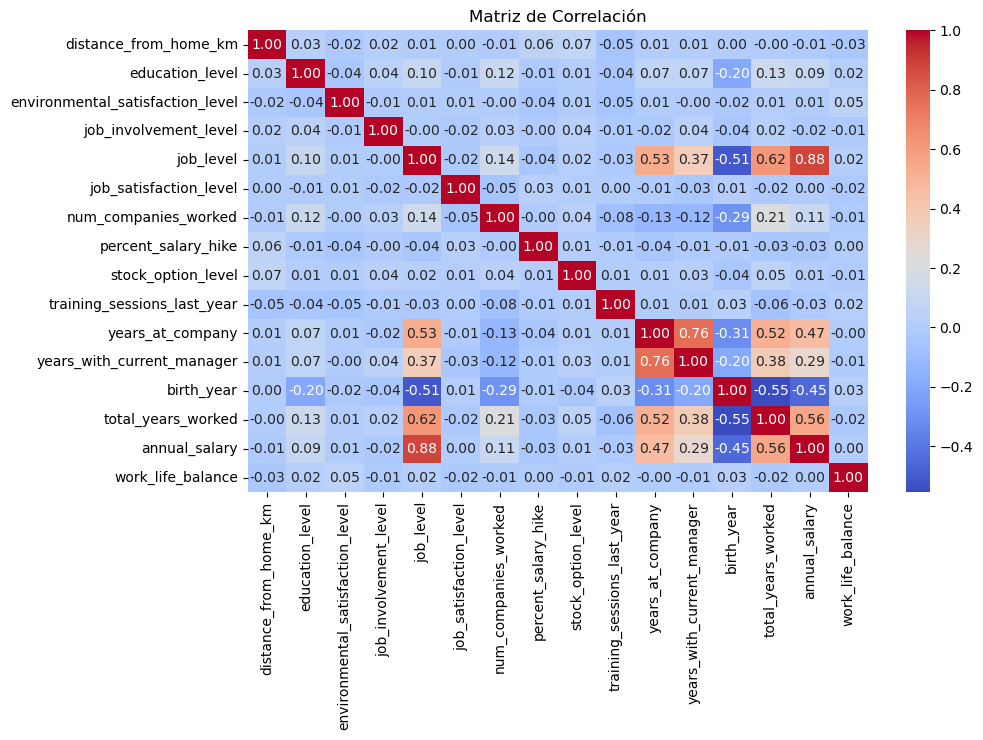

In [145]:
# Para ver la información de manera más intuitiva elaboramos un gráfico de tipo heatmap 
# en el que se puede obervar el nivel de las correlaciones entre avriables numéricas en función  
# del color del índice de la matriz.

plt.figure(figsize=(10, 6))
sns.heatmap(df_correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de la Matriz de Correlación

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto menos tiempo en la empresa, menor es el salario. La antigüedad es recompensada.
2. "years_at_company" y "birth_year" (-0.31): Cuanto menos años lleva en la empresa más joven es el empleado.
3. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han trabajado en más número de empresas.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.


A continuación utilizamos un gráfico de dispersión para identificar relaciones, ver la distribución de puntos en estas variables numéricas y categóricas numéricas.

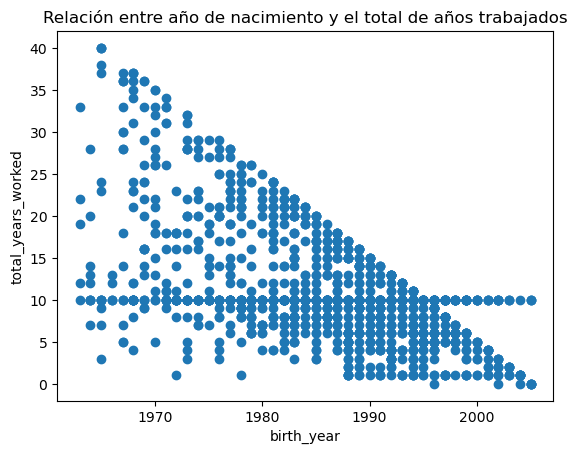

In [146]:
import matplotlib.pyplot as plt
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df_analisis['birth_year'], 
            df_analisis['total_years_worked'])
plt.xlabel('birth_year')
plt.ylabel('total_years_worked')
plt.title("Relación entre año de nacimiento y el total de años trabajados")
plt.show()

In [147]:
# Hay una tendencia lineal en los 10 primeros años de trabajo
df_analisis["total_years_worked"].value_counts().head(10)

total_years_worked
10.0    670
8.0      86
6.0      84
9.0      69
5.0      66
7.0      56
4.0      54
1.0      53
12.0     34
3.0      32
Name: count, dtype: int64

Esta gráfica muestra una relación negativa fuerte entre el año de nacimiento y el total de años trabajados. Cuanto más joven es el empleado, menos años ha trabajado en total. Esto puede ser porque los empleados más jóvenes tienen menos experiencia laboral o porque han cambiado de trabajo con más frecuencia.

Los trabajadores más antiguos (nacidos antes de 1970) pueden haber trabajado hasta 40 años. Los nacidos después del 2000 tienen pocos o ningún año trabajado.

Podemos destacar que hay una frecuencia destacada en 10 años. Esto puede deberse a políticas de la empresa (por ejemplo, revisiones de carrera cada 10 años) o simplemente una tendencia natural en los empleados.

# *Conclusiones del Análisis de Correlaciones*

*Observamos diversos patrones destacados: la empresa puede no recompensar a los nuevos empleados, que parecían ser los más jóvenes ("years_at_company"/birth_year") a pesar de que el nivel educativo de los más jóvenes es ligeramente mayor ("education_level"/"birth_year"), podría ser complicado acceder a un puesto alto con sueldo alto sin haber logrado una estabilidad en la empresa. 

*En cambio, las variables referentes a la satisfacción personal ("environmental_satisfaction_level", "job_satisfaction_level"" y "work_life_balance") no muestran una información relevante. 
Esto podría indicar que la satisfacción sería menos dependiente de factores relacionados con la experiencia, los gerentes, la jerarquía o el sueldo anual.*

# 🔸 *Valoración de los Resultados Obtenidos*

Según los datos que arrojan los métodos de correlación realizados no podemos obtener conclusiones relevantes en cuanto a la rotación de los empleados en la empresa. Con este primer análisis se ha realizado una correlación de las variables numéricas. 

# 2. Variables Categóricas

## 2.1.- 🔍 Análisis Descriptivo

**Vemos interesante a continuación estudiar la información sobre las condiciones laborales de los empleados teniendo en cuenta las variables numéricas categóricas (clasificación de datos en niveles) y las numéricas ya estudiadas en primera instancia.**
### **En concreto, nos centraremos en las relaciones establecidas con las Variables Nominales cuya información también es muy valiosa:**

In [148]:
# Creamos un DataFrame con los datos nominales
df_categ = df_analisis.select_dtypes(include = 'object') 

In [149]:
# Primero observamos la estadística básica de estas
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,male,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


**Resumen de los datos que tenemos hasta el momento:**
La variable que más nos interesa es "employee_turnover" ya que es la decisión de los empleados de rotación o abandono de la empresa.
En total hay 1614 empleados, siendo 1355 los que no renuncian a su puesto mientras que 259 de ellos sí lo han hecho.

 Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling). Puede ser necesario balancear los datos para mejorar la capacidad del modelo de identificar correctamente los casos de rotación.

## 🔍 Análisis Descriptivos de los Tipos de Satisfacción

In [150]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [151]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [152]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


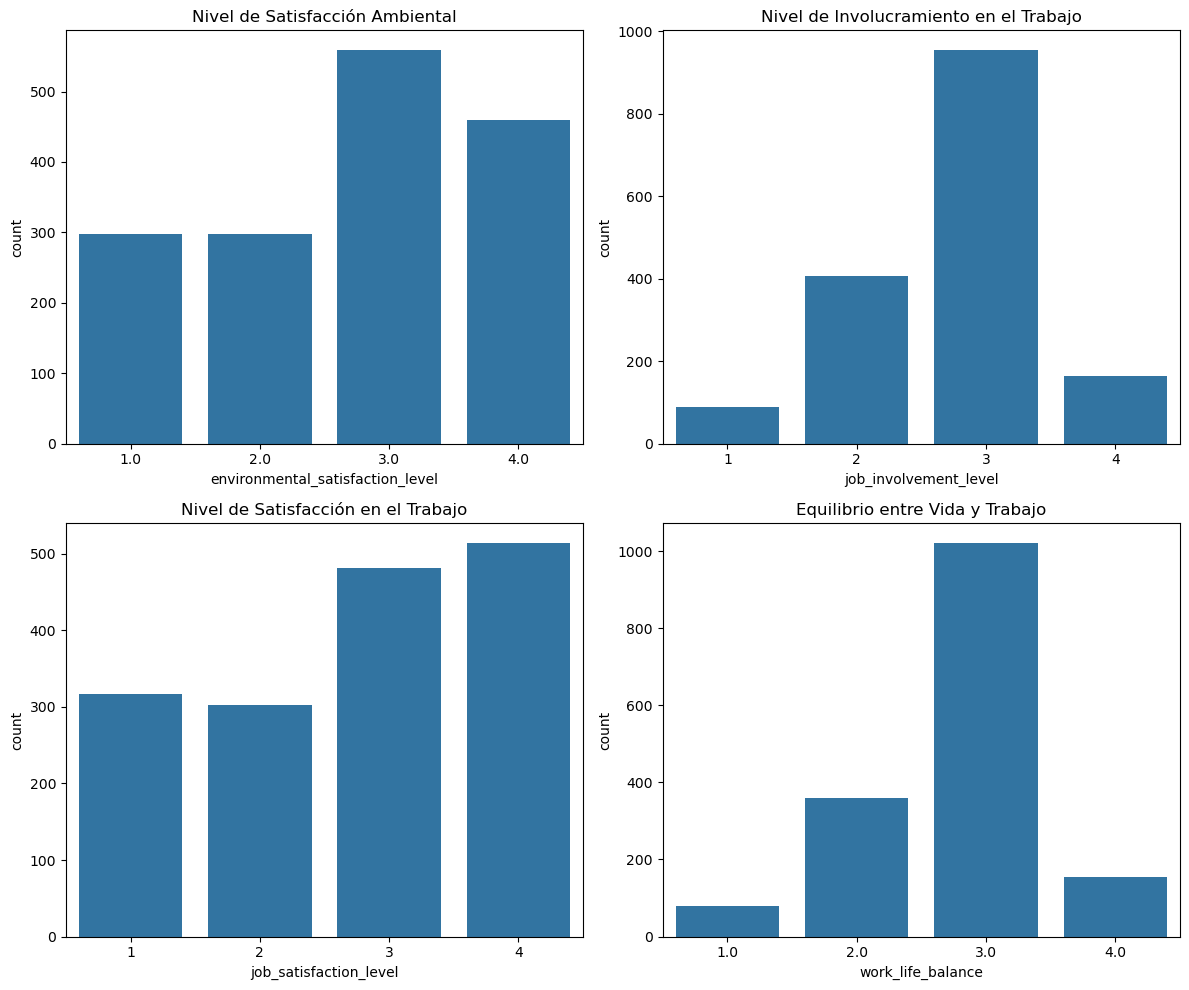

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones de las gráficas descriptivas:
- La satisfacción respecto al entorno de trabajo parece ser alta.
- El compromiso con el trabajo tiende a ser aceptable.
- La satisfacción con el trabajo sería alta.
- El equilibro percibido de la vida personal y profesional es aceptable también.

In [154]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
lista_categoricas = ["employee_turnover", "business_travel_frequency", "gender", "marital_status", "overtime_hours", "standard_work_hours", "remote_work", "job_level"]

In [155]:
# Definimos una función para obtener los porcentajes de cada variable de la tabla
def porcentajes(lista_categoricas):
    resultados = {}  # Diccionario para guardar los resultados
    for x in lista_categoricas:
        porcentaje = df_analisis[x].value_counts(normalize=True) * 100  # Aplicar a cada columna
        resultados[x] = porcentaje  # Guardamos el resultado en el diccionario
    
    return resultados  # Devolvemos el diccionario con todos los porcentajes

# Llamamos a la función
porcentajes(lista_categoricas)


{'employee_turnover': employee_turnover
 no     83.952912
 yes    16.047088
 Name: proportion, dtype: float64,
 'business_travel_frequency': business_travel_frequency
 unknown              47.831475
 travel_rarely        36.307311
 travel_frequently    10.223048
 non_travel            5.638166
 Name: proportion, dtype: float64,
 'gender': gender
 male      60.16109
 female    39.83891
 Name: proportion, dtype: float64,
 'marital_status': marital_status
 unknown     40.334572
 married     27.199504
 single      20.136307
 divorced    12.329616
 Name: proportion, dtype: float64,
 'overtime_hours': overtime_hours
 no      42.255266
 none    41.883519
 yes     15.861214
 Name: proportion, dtype: float64,
 'standard_work_hours': standard_work_hours
 part_time    55.018587
 full_time    24.039653
 none         20.941760
 Name: proportion, dtype: float64,
 'remote_work': remote_work
 yes    61.957869
 no     38.042131
 Name: proportion, dtype: float64,
 'job_level': job_level
 2    36.988848


Antes de poner la atención en la analítica diagnóstica vamos a intentar comprender los datos observados en la tabla anterior:

- Frecuencia de viajes de empresa ("business_travel_frequency"): La categoría más frecuente es "unknown" (772 casos, 48 %). Esto puede ser preocupante a la hora de establecer conclusiones de resultados ya que hay muchos valores desconocidos. Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

- Género ("gender"): Predominan los hombres (971 casos, 60 %) frente a las mujeres (643 casos, 39,84 %). **Podría analizarse si hay diferencias en rotación por género.**

- Estado civil ("marital_status"): Hay muchos valores "unknown" (651 casos,  40,33 %), lo que nuevamente sugiere problemas con la calidad de los datos. **Si esta variable fuera relevante**, podríamos considerar estrategias de imputación.

- Horas extra (overtime_hours): La mayoría de empleados no hacen horas extra (682 casos, 42,25%). Puede ser **interesante ver si hay relación entre hacer horas extra y la rotación.**

- Tipo de jornada (standard_work_hours): 888 empleados (55,02 %) trabajan a tiempo parcial. Esto puede ser un **factor relevante para analizar la rotación.**

- Trabajo remoto (remote_work): 1000 empleados trabajan en remoto (61,95 %). Podríamos **analizar si el trabajo remoto reduce la rotación.**

        A. Análisis Bivariado

**Género** ("gender") vs. **Rotación** ("employee_turnover"): || *¿Hay diferencias en la rotación entre hombres y mujeres?*

**Trabajo Remoto** ("remote_work") vs. **Rotación** ("employee_turnover"): || *¿Los empleados remotos tienen menor rotación que los presenciales?*

**Horas Extra** ("overtime_hours") vs. **Rotación** ("employee_turnover"): || *¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?*

**Frecuencia de Viajes** ("business_travel_frequency") vs. **Rotación** ("employee_turnover"): || *¿Viajar más está relacionado con mayor rotación?*

**Estado Civil** ("marital_status") vs. **Rotación** ("employee_turnover"): || *¿El estado civil influye en la permanencia en la empresa?*

## 2.2.- 📊 Análisis Diagnóstico

        B. Visualización del Análisis

### Rotación de Empleados según su Género
En el siguiente gráfico de barras hemos relacionado las variables de rotación y género para ver si existe una tendencia a rotar por género.

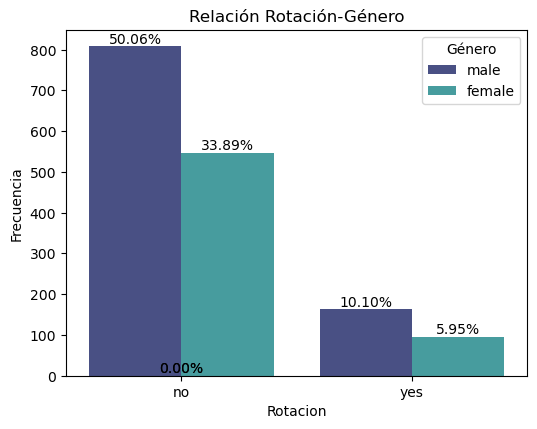

In [156]:
# Creamos un gráfico de barras para observar la distribución de las variables categóricas
plt.figure(figsize=(15, 8))
ax = plt.subplot(2, 3, 1)  # Asignamos el subplot a la variable ax
sns.countplot(x='employee_turnover', 
              hue='gender', 
              palette="mako",
              data=df_categ, 
              ax=ax) 
ax.set_title('Relación Rotación-Género')
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")

# Añadimos etiquetas a los ejes
plt.legend(title='Género')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

# añadimos porcentaje a las barras
total = df_categ['employee_turnover'].value_counts()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total.sum():.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

Resultados:
- La rotación es más alta entre los hombres (10,10 %) que entre las mujeres (5,95 %). En general parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

- Si no supiéramos que el 60 % son hombres esto podría indicar que los hombres son más propensos a dejar la empresa. Además, es importante considerar otros factores como el tipo de trabajo o la antigüedad.

### Rotación de Empleados según si Frecuencia de Viajes Laborales
En el siguiente gráfico de barras hemos relacionado las variables de rotación y frecuencia de viajes laborales para ver si existe una tendencia a rotar por frecuencia de viajes laborales.

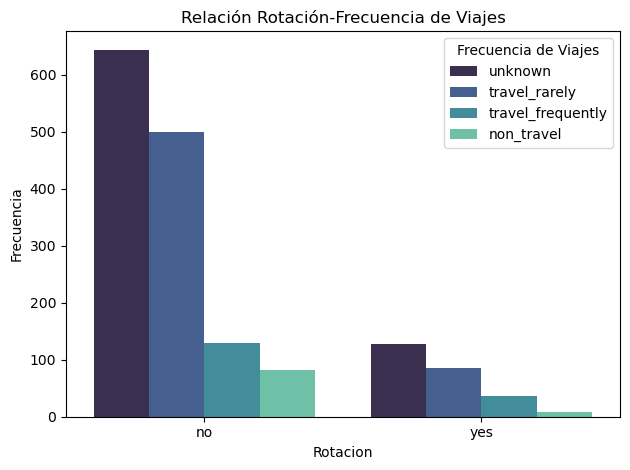

In [157]:
sns.countplot(x='employee_turnover',
              hue='business_travel_frequency',
              palette="mako",
              data=df_categ
              )
plt.title('Relación Rotación-Frecuencia de Viajes')
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")
plt.legend(title='Frecuencia de Viajes')  # Añadimos leyenda para el hue
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos

Resultados:
- Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

- Hay muchos valores "unknown", lo cual dificulta el análisis. Los datos no nos ofrecen una conclusión clara, pues tenemos un sesgo de 48 % datos desconocidos y sólo un 10 % viaja con frecuencia.


### Rotación de Empleados según su Estado Civil
En el siguiente gráfico de barras hemos relacionado las variables de rotación y estado civil para ver si las responsabilidades maritales afectan a la rotación.

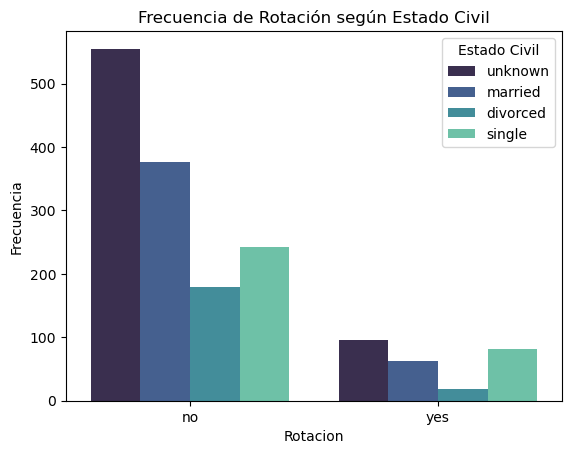

In [158]:
sns.countplot(x='employee_turnover',
              hue = 'marital_status',
              palette="mako",
              data=df_categ
              )
 # Añadimod nombre a hue 
plt.legend(title="Estado Civil", loc='upper right')
# Cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Rotación según Estado Civil")
plt.show()


Resultados:
- En esta visualización destacamos que hay más casados que se quedan que solteros, es decir, en el grupo de los que abandonan sus puestos hay más solteros que casados o divorciados y, sin embargo, hay más casados que deciden no abandonar su estabilidad laboral.
- Hay muchos valores "unknown".
- En resumen, parece que los empleados solteros tienen más rotación que los casados/divorciados.

### Rotación de Empleados según sus Horas Extras
Analizar la rotación de empleados en función de las horas extras es clave para entender los factores que influyen en la decisión de renunciar.

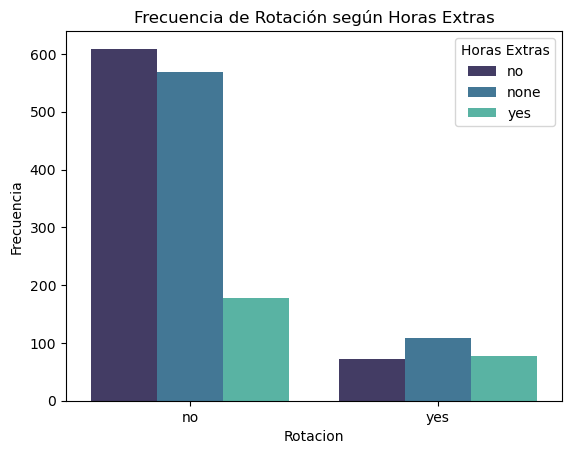

In [159]:
sns.countplot(x='employee_turnover',
              hue = 'overtime_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Horas Extras", loc='upper right')
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Rotación según Horas Extras")
plt.show()

Resultados:
- Este gráfico de barras nos muestra un dato importante en el análisis: los empleados que sí hacen horas extras tienden a abandonar la empresa.

    Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

    Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.
    
- Hay que valorar el sesgo de datos "none" nulos para llegar a unas conclusiones, puede que una variable externa esté afectando tanto a la variable dependiente (rotación) como a la independiente (horas extras), creando una falsa relación entre ellas.

###  Rotación de empleados en función de la Jornada Laboral
Analizar la rotación de empleados en función de la jornada laboral es crucial para comprender cómo el tiempo de trabajo impacta en la permanencia o salida de los empleados. Esta relación puede revelar factores clave que afectan la estabilidad laboral y la satisfacción de los trabajadores.

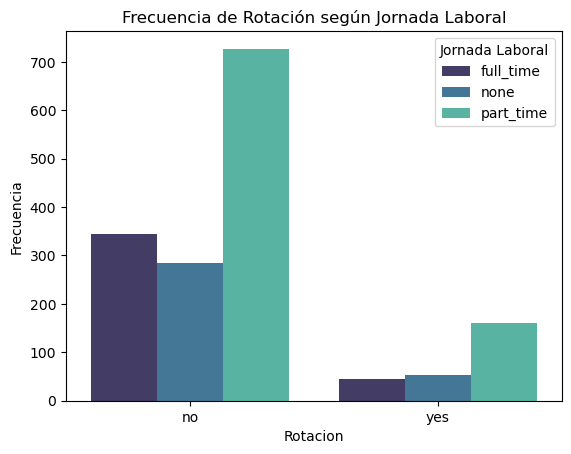

In [160]:
sns.countplot(x='employee_turnover',
              hue = 'standard_work_hours',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Jornada Laboral", loc='upper right')
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Rotación según Jornada Laboral")
plt.show()

Resultados:
- En esta gráfica no encontramos información relevante para nuestras conclusiones puesto que el 55 % de los empleados trabajan a jornada parcial.
- Puede haber una distribución de datos sesgada debido a las respuestas nulas.

**Podemos observar que el tipo de jornada de trabajo no afecta a la rotación pero puede afectar a la satisfacción**

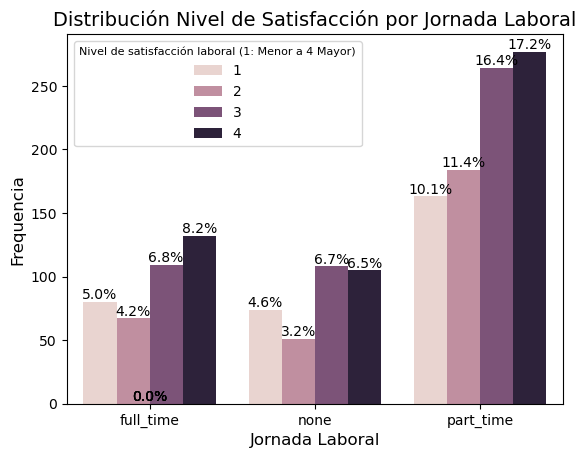

In [161]:
# Creamos el gráfico de barras para las variables de Jornada Laboral y Satisfacción Laboral
ax = sns.countplot(x='standard_work_hours', hue='job_satisfaction_level', data=df_analisis)

# Añadimos etiquetas a los ejes
ax.set_xlabel('Jornada Laboral', fontsize=12)
ax.set_ylabel('Frequencia', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Nivel de satisfacción laboral '
'(1: Menor a 4 Mayor)', title_fontsize=8)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df_analisis)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Mostramos el gráfico
plt.title('Distribución Nivel de Satisfacción por Jornada Laboral', fontsize=14)
plt.show()

Resultados: 
- Podemos observar que en la jornada completa "full_time" 
la satisfacción de los empleados tiende a ser más baja, pues hay más respuestas con satisfacción 1 que 2.

### Rotación de Empleados en Función de Tele-trabajo
En este gráfico de barras veremos si el trabajo en remoto (tele-trabajo) se relaciona directamente con la rotación de los empleados.

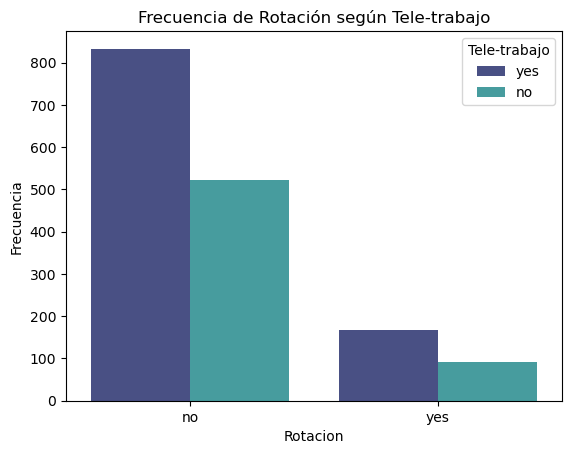

In [162]:
sns.countplot(x='employee_turnover',
              hue = 'remote_work',
              palette="mako",
              data=df_categ
              )

plt.legend(title="Tele-trabajo", loc='upper right')
plt.xlabel("Rotacion")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Rotación según Tele-trabajo")
plt.show()

Resultados:
- Más del 60 % de los trabajadores trabajan desde su casa o a distancia, es coherente y representativo que abandonen más empleados que trabajan en remoto.

### Relación Jerarquía en Trabajo y el Nivel de Satisfacción Laboral
Creemos relevante observar si la satisfacción de los empleados influye según el nivel jerárquico de puesto de trabajo. Como sabemos que "job_level" tiene una correlación positiva con el salario y negativa con el año de nacimiento podremos deducir factores influyentes en la satisfacción

## 3.1.- 🔍 Análisis Descriptivos de los Tipos de Satisfacción

In [163]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [164]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [165]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


# 3.- ✅ Análisis de Contingencias
Una tabla de contingencia es una manera de presentar datos
de enumeración (de conteo) de individuos previamente clasificados en categorías.

### Análisis de los Niveles de Satisfacción respecto a Diferentes Variables

In [166]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [167]:
# Tablas de frecuencia/proporciones de los diferentes niveles de satisficción del empleado cruzándola con las diferentes variables.
# Se usa normalize=True para mostrar los datos en porcentajes.

for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['employee_turnover'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0       4.0
employee_turnover                                                          
no                                13.754647  15.551425  29.925651  24.72119
yes                                4.708798   2.850062   4.708798   3.77943 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3        4
employee_turnover                                             
no                     3.531599  20.446097  50.681537  9.29368
yes                    1.982652   4.708798   8.488228  0.86741 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
employee_turnover                                                 
no                      15.303594  15.427509  25.092937  28.128872
yes                      4.337051   3.283

Estas tablas nos muestran como los empleados que "no" han rotado ("employee_turnover") presentan mayores niveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los que "si" han rotado.

In [168]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['education_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
education_level                                                           
1                                 1.610905  2.230483   4.151177   3.159851
2                                 3.593556  3.841388   6.133829   5.885998
3                                 6.753408  6.319703  14.250310  11.152416
4                                 5.947955  5.018587   9.355638   7.249071
5                                 0.557621  0.991326   0.743494   1.053284 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1         2          3         4
education_level                                               
1                      0.867410  3.035936   6.629492  0.619579
2                      0.929368  5.390335  11.152416  1.982652
3                      1.982652  9.107807  22.924411  4.460967
4                      

Tabla de frecuencia/proporciones para work_life_balance:
 work_life_balance       1.0       2.0        3.0       4.0
education_level                                           
1                  0.371747  2.726146   6.939281  1.115242
2                  1.053284  4.213135  12.267658  1.920694
3                  2.044610  9.417596  23.729864  3.283767
4                  1.301115  5.452292  17.719950  3.097893
5                  0.123916  0.433705   2.602230  0.185874 



Estas tablas nos muestran como los empleados que tienen un nivel educativo mayor ("education_level") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles educativos.

In [169]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['gender'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
gender                                                                      
female                             7.311029   7.372986  14.002478  11.152416
male                              11.152416  11.028501  20.631970  17.348203 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
gender                                                         
female                 2.044610  10.594796  23.358116  3.841388
male                   3.469641  14.560099  35.811648  6.319703 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
gender                                                            
female                   8.054523   8.054523  12.267658  11.462206
male                    11.586121

Estas tablas nos muestran como la variable de género influye en los niveles de satisfación:
-En general las mujeres muestran un mayor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados de sexo masculino

In [170]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['job_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
job_level                                                                 
1                                 6.691450  6.939281  12.701363   9.975217
2                                 6.381660  7.249071  12.267658  11.090458
3                                 2.912020  2.540273   5.947955   3.593556
4                                 1.548947  0.867410   2.416357   2.168525
5                                 0.929368  0.805452   1.301115   1.672862 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1         2          3         4
job_level                                                     
1                      2.168525  9.107807  21.189591  3.841388
2                      2.230483  8.736059  22.057001  3.965304
3                      0.619579  4.399009   8.798017  1.177200
4                      

Estas tablas nos muestran como la variable de nivel del nivel jerárquico del puesto del empleado influye en los niveles de satisfación:
-En general se puede observar que a mayor nivel gerarquico del puesto del empleado, presentan un menor grado de nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles jerarquicos. 

In [171]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['overtime_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
overtime_hours                                                            
no                                8.116481  8.054523  14.436183  11.648079
none                              7.744734  7.372986  14.807931  11.957869
yes                               2.602230  2.973978   5.390335   4.894672 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
overtime_hours                                                 
no                     2.354399  11.028501  24.535316  4.337051
none                   2.044610  10.099133  25.464684  4.275093
yes                    1.115242   4.027261   9.169765  1.548947 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level         1         2          3          4
overtime_hours                        

Estas tablas nos muestran como si el empleado trabaja horas extras (Yes/No) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan horas extras presentan menor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no hacen horas extras. 

In [172]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['standard_work_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0        2.0        3.0        4.0
standard_work_hours                                                        
full_time                         4.708798   4.275093   8.178439   6.877323
none                              4.213135   4.089219   6.381660   6.257745
part_time                         9.541512  10.037175  20.074349  15.365551 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
standard_work_hours                                            
full_time              1.548947   6.505576  13.692689  2.292441
none                   1.177200   4.646840  12.701363  2.416357
part_time              2.788104  14.002478  32.775713  5.452292 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
standard_work_hours            

Estas tablas nos muestran como la clasificación de jornada (Full Time/Part Time) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan part time presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que trabajan full time. 

In [173]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['years_at_company'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
years_at_company                                                        
0                                 0.371747  0.743494  0.743494  0.867410
1                                 2.044610  1.920694  3.655514  2.973978
2                                 1.920694  1.363073  2.973978  2.478315
3                                 2.416357  1.239157  2.478315  2.602230
4                                 1.425031  1.115242  2.292441  2.230483
5                                 2.540273  1.982652  4.708798  3.655514
6                                 0.495663  1.239157  1.920694  1.177200
7                                 0.805452  1.672862  2.168525  2.478315
8                                 0.991326  1.177200  2.912020  1.486989
9                                 0.867410  1.053284  2.044610  1.858736
10                                1.425031  2.23048

Estas tablas nos muestran como los años en la compañia influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados tienen menos años en la empresa presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen más años trabajando en la empresa. 

Los datos parecen representar la distribución de los niveles de implicación laboral (Job Involvement Level) según los años en la empresa (Years at Company).
Filas (Índice: years_at_company)
Representan el número de años que un empleado ha trabajado en la empresa.
Hay valores desde 0 años hasta más de 40 años, aunque algunos valores están ausentes (por ejemplo, no hay 28, 35, 38, 39).
Columnas (job_involvement_level: 1, 2, 3, 4)
Representan diferentes niveles de implicación laboral:
1 = Muy baja implicación
2 = Baja implicación
3 = Alta implicación
4 = Muy alta implicación
Valores en el DataFrame
Son probablemente proporciones o conteos de empleados con un cierto nivel de implicación en cada grupo de años en la empresa.

In [174]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['birth_year'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
birth_year                                                              
1963                              0.123916  0.000000  0.185874  0.000000
1964                              0.123916  0.123916  0.371747  0.000000
1965                              0.123916  0.123916  0.123916  0.557621
1966                              0.061958  0.061958  0.061958  0.123916
1967                              0.185874  0.061958  0.371747  0.433705
1968                              0.185874  0.185874  0.681537  0.495663
1969                              0.247831  0.123916  0.371747  0.495663
1970                              0.309789  0.123916  0.371747  0.433705
1971                              0.185874  0.123916  0.495663  0.371747
1972                              0.371747  0.247831  0.433705  0.185874
1973                              0.371747  0.30978

Estas tablas nos muestran como la edad influye en los niveles de satisfación:
-En general se puede observar que mientras los empleados tienen más edad presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados más jóvenes.

In [175]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['remote_work'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
remote_work                                                                 
no                                 6.939281   6.877323  13.630731  10.594796
yes                               11.524164  11.524164  21.003717  17.905824 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
remote_work                                                    
no                     1.672862  10.037175  22.428748  3.903346
yes                    3.841388  15.117720  36.741016  6.257745 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
remote_work                                                       
no                       7.930607   7.311029  11.586121  11.214374
yes                     11.710037

Estas tablas nos muestran como si el pleado trabaja en remoto (yes/no) remoto influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan en remoto, presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no trabajan de manera remota. 

In [176]:
# Definir rangos de salario (puedes ajustarlos según necesidad)
bins = [0, 30000, 60000, 90000, 120000, 200000]  # Límites de los grupos
labels = ['0-30e', '30e-60e', '60e-90e', '90e-120e', '120e+']  # Etiquetas para los grupos

# Crear una nueva columna categórica en df_analisis
df_analisis['salary_range'] = pd.cut(df_analisis['annual_salary'], bins=bins, labels=labels)

# Crear tablas de frecuencias/proporciones para cada variable de satisfacción
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['salary_range'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencias/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencias/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
salary_range                                                              
0-30e                             4.832714  4.460967   9.541512   7.001239
30e-60e                           8.488228  9.727385  15.241636  14.064436
60e-90e                           1.053284  0.867410   1.982652   1.486989
90e-120e                          2.044610  1.796778   4.708798   2.540273
120e+                             2.044610  1.548947   3.159851   3.407683 

Tabla de frecuencias/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
salary_range                                                   
0-30e                  1.425031   6.753408  14.807931  2.850062
30e-60e                2.726146  11.152416  28.438662  5.204461
60e-90e                0.371747   1.363073   3.097893  0.557621
90e-120e        

Estas tablas nos muestran como el salario anual influye en los niveles de satisfación del empleado:
-En general se puede observar que a mayor salario, los emmpleados presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen un salario anual menor. 

# ❇️ Conclusiones Finales

**Rotación de Empleados:**

La rotación de empleados está influenciada por múltiples factores, como el género, las horas extras, el trabajo remoto, la frecuencia de viajes laborales, y el estado civil.
Los empleados que trabajan horas extras o viajan con frecuencia parecen tener una mayor tendencia a abandonar la empresa.
Los empleados solteros tienen una mayor rotación en comparación con los casados o divorciados.


**Satisfacción Laboral:**

Los empleados con mayores niveles de satisfacción ambiental, satisfacción laboral, involucramiento o compromiso en el trabajo y equilibrio entre vida personal y laboral tienen menos probabilidades de rotar.
Los empleados que trabajan de forma remota o a tiempo parcial tienden a reportar mayores niveles de satisfacción en comparación con los que trabajan a tiempo completo o de manera presencial.

**Factores Demográficos:**

Los empleados más jóvenes y con menos años en la empresa son más tienden a ser más jóvenes y los datos nos muestran niveles de satisfacción altos, pero también muestran una mayor rotación.
Las mujeres, en general, reportan mayores niveles de satisfacción en comparación con los hombres.
Jerarquía y Salario:

A mayor nivel jerárquico y salario, los empleados tienden a reportar mayores niveles de satisfacción. Sin embargo, los niveles jerárquicos más altos también pueden estar asociados con mayores niveles de estrés y menor equilibrio entre vida personal y laboral.

### **Calidad de los Datos:**

Existen valores desconocidos ("unknown") en variables clave como la frecuencia de viajes laborales y el estado civil, lo que puede limitar la capacidad de obtener conclusiones precisas. Sería importante mejorar la calidad de los datos para futuros análisis.

### Recomendaciones:

Mejorar el equilibrio entre vida personal y laboral: Reducir las horas extras y fomentar políticas de trabajo remoto pueden ayudar a disminuir la rotación.

- Atención a los empleados jóvenes: Implementar programas de retención para empleados jóvenes y nuevos en la empresa.

- Revisar la carga laboral de niveles jerárquicos altos: Asegurar que los empleados en niveles altos tengan apoyo para manejar el estrés y mantener un equilibrio saludable.

- Mejorar la calidad de los datos: Investigar y completar los valores desconocidos en variables clave para obtener análisis más precisos.